In [1]:
import torch
import numpy as np

In [2]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

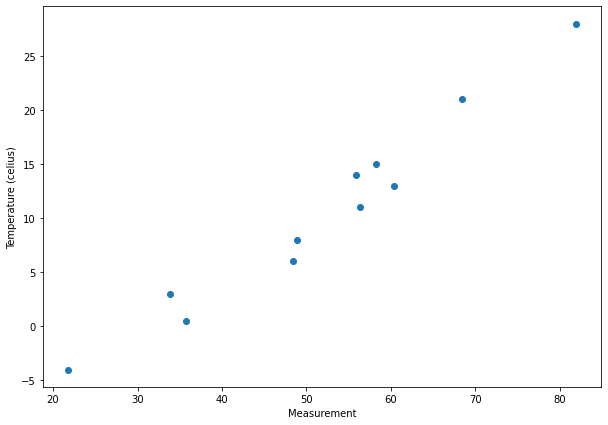

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.xlabel('Measurement')
plt.ylabel('Temperature (celius)')
_ = plt.scatter(x=t_u, y=t_c)

In [4]:
def model(t_u, w, b):
    return (w * t_u) + b

In [5]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c) ** 2
    return squared_diffs.mean()

In [6]:
w = torch.ones(())
b = torch.zeros(())
w, b

(tensor(1.), tensor(0.))

In [7]:
t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [8]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8848)

In [9]:
x = torch.ones(())
y = torch.ones(3, 1)
z = torch.ones(1, 3)
a = torch.ones(2, 1, 1)
print(f"shapes - x: {x.shape}, y: {y.shape}",
      f"\t z: {z.shape}, a: {a.shape}",
      f"\t x * y: {(x*y).shape}",
      f"\t y * z: {(y*z).shape}",
      f"\t y * z * a: {(y*z*a).shape}", sep='\n')

shapes - x: torch.Size([]), y: torch.Size([3, 1])
	 z: torch.Size([1, 3]), a: torch.Size([2, 1, 1])
	 x * y: torch.Size([3, 1])
	 y * z: torch.Size([3, 3])
	 y * z * a: torch.Size([2, 3, 3])


In [10]:
x, y, z, a

(tensor(1.),
 tensor([[1.],
         [1.],
         [1.]]),
 tensor([[1., 1., 1.]]),
 tensor([[[1.]],
 
         [[1.]]]))

In [11]:
delta = 0.1

loss_rate_of_change_w = (loss_fn(model(t_u, w + delta, b), t_c) - loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

In [12]:
learning_rate = 1e-2
learning_rate

0.01

In [13]:
loss_rate_of_change_b = (loss_fn(model(t_u, w, b + delta), t_c) - loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)

In [14]:
w = w - learning_rate * loss_rate_of_change_w
w

tensor(-44.1730)

In [15]:
b = b - learning_rate * loss_rate_of_change_b
b

tensor(-0.8260)

In [16]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs

In [17]:
t_p.size(0)

11

In [18]:
def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

In [19]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [20]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs+1):
        w, b = params
        
        t_p = model(t_u, w , b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)
        
        params = params - learning_rate * grad
        
        print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [21]:
t_un = (t_u - t_u.mean()) / t_u.std()
params = training_loop(
    n_epochs=10000,
    learning_rate=1e-4,
    params=torch.tensor([ 0.53383, -17.2078]),
    t_u=t_un,
    t_c=t_c
)

Epoch 1, Loss 836.348267
Epoch 2, Loss 836.017395
Epoch 3, Loss 835.686707
Epoch 4, Loss 835.355835
Epoch 5, Loss 835.025330
Epoch 6, Loss 834.694946
Epoch 7, Loss 834.364685
Epoch 8, Loss 834.034546
Epoch 9, Loss 833.704529
Epoch 10, Loss 833.374573
Epoch 11, Loss 833.044861
Epoch 12, Loss 832.715088
Epoch 13, Loss 832.385681
Epoch 14, Loss 832.056274
Epoch 15, Loss 831.727112
Epoch 16, Loss 831.398071
Epoch 17, Loss 831.068909
Epoch 18, Loss 830.740173
Epoch 19, Loss 830.411377
Epoch 20, Loss 830.082764
Epoch 21, Loss 829.754333
Epoch 22, Loss 829.426025
Epoch 23, Loss 829.097717
Epoch 24, Loss 828.769592
Epoch 25, Loss 828.441772
Epoch 26, Loss 828.113892
Epoch 27, Loss 827.786316
Epoch 28, Loss 827.458801
Epoch 29, Loss 827.131287
Epoch 30, Loss 826.804260
Epoch 31, Loss 826.476929
Epoch 32, Loss 826.149841
Epoch 33, Loss 825.823059
Epoch 34, Loss 825.496277
Epoch 35, Loss 825.169678
Epoch 36, Loss 824.843140
Epoch 37, Loss 824.516785
Epoch 38, Loss 824.190430
Epoch 39, Loss 823.86

Epoch 465, Loss 696.087646
Epoch 466, Loss 695.812439
Epoch 467, Loss 695.537292
Epoch 468, Loss 695.262207
Epoch 469, Loss 694.987366
Epoch 470, Loss 694.712585
Epoch 471, Loss 694.437927
Epoch 472, Loss 694.163391
Epoch 473, Loss 693.888916
Epoch 474, Loss 693.614685
Epoch 475, Loss 693.340393
Epoch 476, Loss 693.066345
Epoch 477, Loss 692.792297
Epoch 478, Loss 692.518433
Epoch 479, Loss 692.244568
Epoch 480, Loss 691.970886
Epoch 481, Loss 691.697266
Epoch 482, Loss 691.423767
Epoch 483, Loss 691.150452
Epoch 484, Loss 690.877197
Epoch 485, Loss 690.603943
Epoch 486, Loss 690.330872
Epoch 487, Loss 690.057983
Epoch 488, Loss 689.785217
Epoch 489, Loss 689.512451
Epoch 490, Loss 689.239929
Epoch 491, Loss 688.967346
Epoch 492, Loss 688.695007
Epoch 493, Loss 688.422668
Epoch 494, Loss 688.150635
Epoch 495, Loss 687.878479
Epoch 496, Loss 687.606506
Epoch 497, Loss 687.334656
Epoch 498, Loss 687.062988
Epoch 499, Loss 686.791321
Epoch 500, Loss 686.519775
Epoch 501, Loss 686.248413
E

Epoch 865, Loss 594.284058
Epoch 866, Loss 594.049377
Epoch 867, Loss 593.814697
Epoch 868, Loss 593.580017
Epoch 869, Loss 593.345520
Epoch 870, Loss 593.111084
Epoch 871, Loss 592.876770
Epoch 872, Loss 592.642517
Epoch 873, Loss 592.408447
Epoch 874, Loss 592.174377
Epoch 875, Loss 591.940430
Epoch 876, Loss 591.706604
Epoch 877, Loss 591.472778
Epoch 878, Loss 591.239197
Epoch 879, Loss 591.005493
Epoch 880, Loss 590.772095
Epoch 881, Loss 590.538696
Epoch 882, Loss 590.305420
Epoch 883, Loss 590.072205
Epoch 884, Loss 589.839111
Epoch 885, Loss 589.606079
Epoch 886, Loss 589.373230
Epoch 887, Loss 589.140381
Epoch 888, Loss 588.907654
Epoch 889, Loss 588.674988
Epoch 890, Loss 588.442505
Epoch 891, Loss 588.209961
Epoch 892, Loss 587.977661
Epoch 893, Loss 587.745361
Epoch 894, Loss 587.513245
Epoch 895, Loss 587.281189
Epoch 896, Loss 587.049194
Epoch 897, Loss 586.817322
Epoch 898, Loss 586.585510
Epoch 899, Loss 586.353760
Epoch 900, Loss 586.122192
Epoch 901, Loss 585.890564
E

Epoch 1310, Loss 498.505249
Epoch 1311, Loss 498.308594
Epoch 1312, Loss 498.111908
Epoch 1313, Loss 497.915344
Epoch 1314, Loss 497.718872
Epoch 1315, Loss 497.522430
Epoch 1316, Loss 497.326080
Epoch 1317, Loss 497.129791
Epoch 1318, Loss 496.933594
Epoch 1319, Loss 496.737579
Epoch 1320, Loss 496.541473
Epoch 1321, Loss 496.345520
Epoch 1322, Loss 496.149719
Epoch 1323, Loss 495.954010
Epoch 1324, Loss 495.758270
Epoch 1325, Loss 495.562500
Epoch 1326, Loss 495.367004
Epoch 1327, Loss 495.171509
Epoch 1328, Loss 494.976105
Epoch 1329, Loss 494.780853
Epoch 1330, Loss 494.585541
Epoch 1331, Loss 494.390350
Epoch 1332, Loss 494.195282
Epoch 1333, Loss 494.000275
Epoch 1334, Loss 493.805359
Epoch 1335, Loss 493.610474
Epoch 1336, Loss 493.415649
Epoch 1337, Loss 493.220978
Epoch 1338, Loss 493.026367
Epoch 1339, Loss 492.831818
Epoch 1340, Loss 492.637329
Epoch 1341, Loss 492.442963
Epoch 1342, Loss 492.248657
Epoch 1343, Loss 492.054413
Epoch 1344, Loss 491.860229
Epoch 1345, Loss 491

Epoch 1736, Loss 421.391998
Epoch 1737, Loss 421.225891
Epoch 1738, Loss 421.059875
Epoch 1739, Loss 420.893921
Epoch 1740, Loss 420.728027
Epoch 1741, Loss 420.562195
Epoch 1742, Loss 420.396393
Epoch 1743, Loss 420.230682
Epoch 1744, Loss 420.065063
Epoch 1745, Loss 419.899536
Epoch 1746, Loss 419.733978
Epoch 1747, Loss 419.568481
Epoch 1748, Loss 419.403198
Epoch 1749, Loss 419.237885
Epoch 1750, Loss 419.072632
Epoch 1751, Loss 418.907440
Epoch 1752, Loss 418.742371
Epoch 1753, Loss 418.577332
Epoch 1754, Loss 418.412292
Epoch 1755, Loss 418.247375
Epoch 1756, Loss 418.082550
Epoch 1757, Loss 417.917755
Epoch 1758, Loss 417.753052
Epoch 1759, Loss 417.588379
Epoch 1760, Loss 417.423828
Epoch 1761, Loss 417.259277
Epoch 1762, Loss 417.094849
Epoch 1763, Loss 416.930389
Epoch 1764, Loss 416.766083
Epoch 1765, Loss 416.601868
Epoch 1766, Loss 416.437714
Epoch 1767, Loss 416.273560
Epoch 1768, Loss 416.109467
Epoch 1769, Loss 415.945435
Epoch 1770, Loss 415.781525
Epoch 1771, Loss 415

Epoch 2191, Loss 352.239960
Epoch 2192, Loss 352.101288
Epoch 2193, Loss 351.962769
Epoch 2194, Loss 351.824219
Epoch 2195, Loss 351.685760
Epoch 2196, Loss 351.547302
Epoch 2197, Loss 351.408997
Epoch 2198, Loss 351.270691
Epoch 2199, Loss 351.132416
Epoch 2200, Loss 350.994263
Epoch 2201, Loss 350.856110
Epoch 2202, Loss 350.718018
Epoch 2203, Loss 350.579956
Epoch 2204, Loss 350.442017
Epoch 2205, Loss 350.304108
Epoch 2206, Loss 350.166229
Epoch 2207, Loss 350.028442
Epoch 2208, Loss 349.890656
Epoch 2209, Loss 349.752960
Epoch 2210, Loss 349.615356
Epoch 2211, Loss 349.477722
Epoch 2212, Loss 349.340210
Epoch 2213, Loss 349.202698
Epoch 2214, Loss 349.065308
Epoch 2215, Loss 348.927948
Epoch 2216, Loss 348.790588
Epoch 2217, Loss 348.653351
Epoch 2218, Loss 348.516144
Epoch 2219, Loss 348.378998
Epoch 2220, Loss 348.241882
Epoch 2221, Loss 348.104858
Epoch 2222, Loss 347.967865
Epoch 2223, Loss 347.830933
Epoch 2224, Loss 347.694061
Epoch 2225, Loss 347.557251
Epoch 2226, Loss 347

Epoch 2626, Loss 296.845612
Epoch 2627, Loss 296.729004
Epoch 2628, Loss 296.612427
Epoch 2629, Loss 296.495880
Epoch 2630, Loss 296.379364
Epoch 2631, Loss 296.262909
Epoch 2632, Loss 296.146515
Epoch 2633, Loss 296.030182
Epoch 2634, Loss 295.913879
Epoch 2635, Loss 295.797607
Epoch 2636, Loss 295.681366
Epoch 2637, Loss 295.565186
Epoch 2638, Loss 295.449097
Epoch 2639, Loss 295.332977
Epoch 2640, Loss 295.216949
Epoch 2641, Loss 295.100952
Epoch 2642, Loss 294.985016
Epoch 2643, Loss 294.869141
Epoch 2644, Loss 294.753265
Epoch 2645, Loss 294.637421
Epoch 2646, Loss 294.521729
Epoch 2647, Loss 294.405975
Epoch 2648, Loss 294.290314
Epoch 2649, Loss 294.174683
Epoch 2650, Loss 294.059113
Epoch 2651, Loss 293.943634
Epoch 2652, Loss 293.828125
Epoch 2653, Loss 293.712677
Epoch 2654, Loss 293.597290
Epoch 2655, Loss 293.481964
Epoch 2656, Loss 293.366669
Epoch 2657, Loss 293.251373
Epoch 2658, Loss 293.136200
Epoch 2659, Loss 293.021027
Epoch 2660, Loss 292.905914
Epoch 2661, Loss 292

Epoch 2978, Loss 258.522766
Epoch 2979, Loss 258.421295
Epoch 2980, Loss 258.319946
Epoch 2981, Loss 258.218597
Epoch 2982, Loss 258.117340
Epoch 2983, Loss 258.016083
Epoch 2984, Loss 257.914825
Epoch 2985, Loss 257.813690
Epoch 2986, Loss 257.712524
Epoch 2987, Loss 257.611450
Epoch 2988, Loss 257.510345
Epoch 2989, Loss 257.409393
Epoch 2990, Loss 257.308380
Epoch 2991, Loss 257.207428
Epoch 2992, Loss 257.106567
Epoch 2993, Loss 257.005646
Epoch 2994, Loss 256.904877
Epoch 2995, Loss 256.804077
Epoch 2996, Loss 256.703339
Epoch 2997, Loss 256.602661
Epoch 2998, Loss 256.501984
Epoch 2999, Loss 256.401367
Epoch 3000, Loss 256.300842
Epoch 3001, Loss 256.200287
Epoch 3002, Loss 256.099762
Epoch 3003, Loss 255.999329
Epoch 3004, Loss 255.898926
Epoch 3005, Loss 255.798523
Epoch 3006, Loss 255.698181
Epoch 3007, Loss 255.597885
Epoch 3008, Loss 255.497650
Epoch 3009, Loss 255.397415
Epoch 3010, Loss 255.297211
Epoch 3011, Loss 255.197113
Epoch 3012, Loss 255.096985
Epoch 3013, Loss 254

Epoch 3383, Loss 220.573547
Epoch 3384, Loss 220.487198
Epoch 3385, Loss 220.400879
Epoch 3386, Loss 220.314606
Epoch 3387, Loss 220.228317
Epoch 3388, Loss 220.142105
Epoch 3389, Loss 220.055923
Epoch 3390, Loss 219.969818
Epoch 3391, Loss 219.883698
Epoch 3392, Loss 219.797607
Epoch 3393, Loss 219.711533
Epoch 3394, Loss 219.625580
Epoch 3395, Loss 219.539566
Epoch 3396, Loss 219.453629
Epoch 3397, Loss 219.367737
Epoch 3398, Loss 219.281845
Epoch 3399, Loss 219.196030
Epoch 3400, Loss 219.110214
Epoch 3401, Loss 219.024429
Epoch 3402, Loss 218.938721
Epoch 3403, Loss 218.853027
Epoch 3404, Loss 218.767334
Epoch 3405, Loss 218.681702
Epoch 3406, Loss 218.596100
Epoch 3407, Loss 218.510544
Epoch 3408, Loss 218.425003
Epoch 3409, Loss 218.339508
Epoch 3410, Loss 218.254044
Epoch 3411, Loss 218.168640
Epoch 3412, Loss 218.083237
Epoch 3413, Loss 217.997849
Epoch 3414, Loss 217.912537
Epoch 3415, Loss 217.827240
Epoch 3416, Loss 217.741959
Epoch 3417, Loss 217.656738
Epoch 3418, Loss 217

Epoch 3884, Loss 181.335251
Epoch 3885, Loss 181.264465
Epoch 3886, Loss 181.193726
Epoch 3887, Loss 181.123016
Epoch 3888, Loss 181.052307
Epoch 3889, Loss 180.981659
Epoch 3890, Loss 180.911011
Epoch 3891, Loss 180.840424
Epoch 3892, Loss 180.769836
Epoch 3893, Loss 180.699280
Epoch 3894, Loss 180.628754
Epoch 3895, Loss 180.558258
Epoch 3896, Loss 180.487793
Epoch 3897, Loss 180.417358
Epoch 3898, Loss 180.346939
Epoch 3899, Loss 180.276566
Epoch 3900, Loss 180.206192
Epoch 3901, Loss 180.135895
Epoch 3902, Loss 180.065582
Epoch 3903, Loss 179.995331
Epoch 3904, Loss 179.925064
Epoch 3905, Loss 179.854843
Epoch 3906, Loss 179.784653
Epoch 3907, Loss 179.714539
Epoch 3908, Loss 179.644394
Epoch 3909, Loss 179.574280
Epoch 3910, Loss 179.504211
Epoch 3911, Loss 179.434158
Epoch 3912, Loss 179.364151
Epoch 3913, Loss 179.294159
Epoch 3914, Loss 179.224182
Epoch 3915, Loss 179.154251
Epoch 3916, Loss 179.084335
Epoch 3917, Loss 179.014465
Epoch 3918, Loss 178.944641
Epoch 3919, Loss 178

Epoch 4264, Loss 156.366684
Epoch 4265, Loss 156.305801
Epoch 4266, Loss 156.244965
Epoch 4267, Loss 156.184143
Epoch 4268, Loss 156.123367
Epoch 4269, Loss 156.062607
Epoch 4270, Loss 156.001862
Epoch 4271, Loss 155.941147
Epoch 4272, Loss 155.880447
Epoch 4273, Loss 155.819763
Epoch 4274, Loss 155.759140
Epoch 4275, Loss 155.698502
Epoch 4276, Loss 155.637924
Epoch 4277, Loss 155.577332
Epoch 4278, Loss 155.516785
Epoch 4279, Loss 155.456268
Epoch 4280, Loss 155.395767
Epoch 4281, Loss 155.335297
Epoch 4282, Loss 155.274841
Epoch 4283, Loss 155.214417
Epoch 4284, Loss 155.154007
Epoch 4285, Loss 155.093613
Epoch 4286, Loss 155.033249
Epoch 4287, Loss 154.972916
Epoch 4288, Loss 154.912613
Epoch 4289, Loss 154.852310
Epoch 4290, Loss 154.792084
Epoch 4291, Loss 154.731827
Epoch 4292, Loss 154.671616
Epoch 4293, Loss 154.611420
Epoch 4294, Loss 154.551285
Epoch 4295, Loss 154.491104
Epoch 4296, Loss 154.430984
Epoch 4297, Loss 154.370911
Epoch 4298, Loss 154.310806
Epoch 4299, Loss 154

Epoch 4911, Loss 121.632256
Epoch 4912, Loss 121.585182
Epoch 4913, Loss 121.538116
Epoch 4914, Loss 121.491089
Epoch 4915, Loss 121.444061
Epoch 4916, Loss 121.397049
Epoch 4917, Loss 121.350090
Epoch 4918, Loss 121.303123
Epoch 4919, Loss 121.256172
Epoch 4920, Loss 121.209251
Epoch 4921, Loss 121.162346
Epoch 4922, Loss 121.115456
Epoch 4923, Loss 121.068581
Epoch 4924, Loss 121.021729
Epoch 4925, Loss 120.974876
Epoch 4926, Loss 120.928055
Epoch 4927, Loss 120.881271
Epoch 4928, Loss 120.834496
Epoch 4929, Loss 120.787720
Epoch 4930, Loss 120.740990
Epoch 4931, Loss 120.694283
Epoch 4932, Loss 120.647537
Epoch 4933, Loss 120.600861
Epoch 4934, Loss 120.554199
Epoch 4935, Loss 120.507568
Epoch 4936, Loss 120.460945
Epoch 4937, Loss 120.414314
Epoch 4938, Loss 120.367722
Epoch 4939, Loss 120.321159
Epoch 4940, Loss 120.274590
Epoch 4941, Loss 120.228058
Epoch 4942, Loss 120.181541
Epoch 4943, Loss 120.135033
Epoch 4944, Loss 120.088554
Epoch 4945, Loss 120.042091
Epoch 4946, Loss 119

Epoch 5350, Loss 102.662308
Epoch 5351, Loss 102.622757
Epoch 5352, Loss 102.583221
Epoch 5353, Loss 102.543724
Epoch 5354, Loss 102.504204
Epoch 5355, Loss 102.464722
Epoch 5356, Loss 102.425240
Epoch 5357, Loss 102.385796
Epoch 5358, Loss 102.346367
Epoch 5359, Loss 102.306931
Epoch 5360, Loss 102.267548
Epoch 5361, Loss 102.228127
Epoch 5362, Loss 102.188766
Epoch 5363, Loss 102.149406
Epoch 5364, Loss 102.110062
Epoch 5365, Loss 102.070732
Epoch 5366, Loss 102.031403
Epoch 5367, Loss 101.992119
Epoch 5368, Loss 101.952827
Epoch 5369, Loss 101.913574
Epoch 5370, Loss 101.874313
Epoch 5371, Loss 101.835075
Epoch 5372, Loss 101.795853
Epoch 5373, Loss 101.756645
Epoch 5374, Loss 101.717476
Epoch 5375, Loss 101.678299
Epoch 5376, Loss 101.639137
Epoch 5377, Loss 101.599998
Epoch 5378, Loss 101.560860
Epoch 5379, Loss 101.521736
Epoch 5380, Loss 101.482643
Epoch 5381, Loss 101.443573
Epoch 5382, Loss 101.404510
Epoch 5383, Loss 101.365471
Epoch 5384, Loss 101.326424
Epoch 5385, Loss 101

Epoch 5777, Loss 87.125465
Epoch 5778, Loss 87.092079
Epoch 5779, Loss 87.058716
Epoch 5780, Loss 87.025345
Epoch 5781, Loss 86.992012
Epoch 5782, Loss 86.958672
Epoch 5783, Loss 86.925362
Epoch 5784, Loss 86.892052
Epoch 5785, Loss 86.858772
Epoch 5786, Loss 86.825493
Epoch 5787, Loss 86.792229
Epoch 5788, Loss 86.758965
Epoch 5789, Loss 86.725739
Epoch 5790, Loss 86.692505
Epoch 5791, Loss 86.659294
Epoch 5792, Loss 86.626091
Epoch 5793, Loss 86.592903
Epoch 5794, Loss 86.559738
Epoch 5795, Loss 86.526581
Epoch 5796, Loss 86.493439
Epoch 5797, Loss 86.460304
Epoch 5798, Loss 86.427185
Epoch 5799, Loss 86.394066
Epoch 5800, Loss 86.360977
Epoch 5801, Loss 86.327904
Epoch 5802, Loss 86.294838
Epoch 5803, Loss 86.261787
Epoch 5804, Loss 86.228745
Epoch 5805, Loss 86.195709
Epoch 5806, Loss 86.162697
Epoch 5807, Loss 86.129700
Epoch 5808, Loss 86.096710
Epoch 5809, Loss 86.063728
Epoch 5810, Loss 86.030769
Epoch 5811, Loss 85.997833
Epoch 5812, Loss 85.964882
Epoch 5813, Loss 85.931961
E

Epoch 6203, Loss 74.038651
Epoch 6204, Loss 74.010468
Epoch 6205, Loss 73.982292
Epoch 6206, Loss 73.954109
Epoch 6207, Loss 73.925957
Epoch 6208, Loss 73.897812
Epoch 6209, Loss 73.869682
Epoch 6210, Loss 73.841545
Epoch 6211, Loss 73.813446
Epoch 6212, Loss 73.785332
Epoch 6213, Loss 73.757240
Epoch 6214, Loss 73.729164
Epoch 6215, Loss 73.701103
Epoch 6216, Loss 73.673035
Epoch 6217, Loss 73.644989
Epoch 6218, Loss 73.616951
Epoch 6219, Loss 73.588928
Epoch 6220, Loss 73.560921
Epoch 6221, Loss 73.532921
Epoch 6222, Loss 73.504929
Epoch 6223, Loss 73.476936
Epoch 6224, Loss 73.448982
Epoch 6225, Loss 73.421028
Epoch 6226, Loss 73.393082
Epoch 6227, Loss 73.365143
Epoch 6228, Loss 73.337219
Epoch 6229, Loss 73.309303
Epoch 6230, Loss 73.281403
Epoch 6231, Loss 73.253517
Epoch 6232, Loss 73.225639
Epoch 6233, Loss 73.197762
Epoch 6234, Loss 73.169922
Epoch 6235, Loss 73.142059
Epoch 6236, Loss 73.114235
Epoch 6237, Loss 73.086403
Epoch 6238, Loss 73.058594
Epoch 6239, Loss 73.030785
E

Epoch 6586, Loss 64.019859
Epoch 6587, Loss 63.995640
Epoch 6588, Loss 63.971436
Epoch 6589, Loss 63.947231
Epoch 6590, Loss 63.923050
Epoch 6591, Loss 63.898865
Epoch 6592, Loss 63.874699
Epoch 6593, Loss 63.850536
Epoch 6594, Loss 63.826382
Epoch 6595, Loss 63.802246
Epoch 6596, Loss 63.778126
Epoch 6597, Loss 63.754005
Epoch 6598, Loss 63.729897
Epoch 6599, Loss 63.705788
Epoch 6600, Loss 63.681690
Epoch 6601, Loss 63.657619
Epoch 6602, Loss 63.633541
Epoch 6603, Loss 63.609482
Epoch 6604, Loss 63.585426
Epoch 6605, Loss 63.561378
Epoch 6606, Loss 63.537350
Epoch 6607, Loss 63.513317
Epoch 6608, Loss 63.489307
Epoch 6609, Loss 63.465305
Epoch 6610, Loss 63.441299
Epoch 6611, Loss 63.417313
Epoch 6612, Loss 63.393337
Epoch 6613, Loss 63.369370
Epoch 6614, Loss 63.345409
Epoch 6615, Loss 63.321468
Epoch 6616, Loss 63.297523
Epoch 6617, Loss 63.273598
Epoch 6618, Loss 63.249680
Epoch 6619, Loss 63.225765
Epoch 6620, Loss 63.201859
Epoch 6621, Loss 63.177975
Epoch 6622, Loss 63.154087
E

Epoch 7018, Loss 54.403809
Epoch 7019, Loss 54.383408
Epoch 7020, Loss 54.363014
Epoch 7021, Loss 54.342625
Epoch 7022, Loss 54.322250
Epoch 7023, Loss 54.301880
Epoch 7024, Loss 54.281521
Epoch 7025, Loss 54.261158
Epoch 7026, Loss 54.240822
Epoch 7027, Loss 54.220474
Epoch 7028, Loss 54.200150
Epoch 7029, Loss 54.179832
Epoch 7030, Loss 54.159519
Epoch 7031, Loss 54.139217
Epoch 7032, Loss 54.118912
Epoch 7033, Loss 54.098621
Epoch 7034, Loss 54.078342
Epoch 7035, Loss 54.058071
Epoch 7036, Loss 54.037807
Epoch 7037, Loss 54.017551
Epoch 7038, Loss 53.997299
Epoch 7039, Loss 53.977051
Epoch 7040, Loss 53.956833
Epoch 7041, Loss 53.936596
Epoch 7042, Loss 53.916386
Epoch 7043, Loss 53.896179
Epoch 7044, Loss 53.875977
Epoch 7045, Loss 53.855785
Epoch 7046, Loss 53.835594
Epoch 7047, Loss 53.815418
Epoch 7048, Loss 53.795254
Epoch 7049, Loss 53.775097
Epoch 7050, Loss 53.754944
Epoch 7051, Loss 53.734798
Epoch 7052, Loss 53.714661
Epoch 7053, Loss 53.694530
Epoch 7054, Loss 53.674404
E

Epoch 7459, Loss 46.147865
Epoch 7460, Loss 46.130726
Epoch 7461, Loss 46.113613
Epoch 7462, Loss 46.096493
Epoch 7463, Loss 46.079380
Epoch 7464, Loss 46.062283
Epoch 7465, Loss 46.045181
Epoch 7466, Loss 46.028099
Epoch 7467, Loss 46.011021
Epoch 7468, Loss 45.993950
Epoch 7469, Loss 45.976883
Epoch 7470, Loss 45.959824
Epoch 7471, Loss 45.942772
Epoch 7472, Loss 45.925724
Epoch 7473, Loss 45.908688
Epoch 7474, Loss 45.891659
Epoch 7475, Loss 45.874630
Epoch 7476, Loss 45.857605
Epoch 7477, Loss 45.840591
Epoch 7478, Loss 45.823589
Epoch 7479, Loss 45.806591
Epoch 7480, Loss 45.789597
Epoch 7481, Loss 45.772614
Epoch 7482, Loss 45.755630
Epoch 7483, Loss 45.738651
Epoch 7484, Loss 45.721691
Epoch 7485, Loss 45.704727
Epoch 7486, Loss 45.687778
Epoch 7487, Loss 45.670826
Epoch 7488, Loss 45.653893
Epoch 7489, Loss 45.636955
Epoch 7490, Loss 45.620033
Epoch 7491, Loss 45.603119
Epoch 7492, Loss 45.586208
Epoch 7493, Loss 45.569305
Epoch 7494, Loss 45.552414
Epoch 7495, Loss 45.535519
E

Epoch 7807, Loss 40.579281
Epoch 7808, Loss 40.564358
Epoch 7809, Loss 40.549442
Epoch 7810, Loss 40.534534
Epoch 7811, Loss 40.519634
Epoch 7812, Loss 40.504734
Epoch 7813, Loss 40.489845
Epoch 7814, Loss 40.474968
Epoch 7815, Loss 40.460091
Epoch 7816, Loss 40.445217
Epoch 7817, Loss 40.430351
Epoch 7818, Loss 40.415489
Epoch 7819, Loss 40.400642
Epoch 7820, Loss 40.385788
Epoch 7821, Loss 40.370953
Epoch 7822, Loss 40.356113
Epoch 7823, Loss 40.341286
Epoch 7824, Loss 40.326462
Epoch 7825, Loss 40.311638
Epoch 7826, Loss 40.296825
Epoch 7827, Loss 40.282013
Epoch 7828, Loss 40.267216
Epoch 7829, Loss 40.252415
Epoch 7830, Loss 40.237625
Epoch 7831, Loss 40.222839
Epoch 7832, Loss 40.208061
Epoch 7833, Loss 40.193287
Epoch 7834, Loss 40.178520
Epoch 7835, Loss 40.163761
Epoch 7836, Loss 40.149010
Epoch 7837, Loss 40.134251
Epoch 7838, Loss 40.119514
Epoch 7839, Loss 40.104774
Epoch 7840, Loss 40.090046
Epoch 7841, Loss 40.075321
Epoch 7842, Loss 40.060600
Epoch 7843, Loss 40.045887
E

Epoch 8206, Loss 35.072472
Epoch 8207, Loss 35.059734
Epoch 8208, Loss 35.047005
Epoch 8209, Loss 35.034279
Epoch 8210, Loss 35.021557
Epoch 8211, Loss 35.008842
Epoch 8212, Loss 34.996128
Epoch 8213, Loss 34.983425
Epoch 8214, Loss 34.970718
Epoch 8215, Loss 34.958027
Epoch 8216, Loss 34.945339
Epoch 8217, Loss 34.932652
Epoch 8218, Loss 34.919971
Epoch 8219, Loss 34.907295
Epoch 8220, Loss 34.894627
Epoch 8221, Loss 34.881962
Epoch 8222, Loss 34.869301
Epoch 8223, Loss 34.856644
Epoch 8224, Loss 34.843994
Epoch 8225, Loss 34.831348
Epoch 8226, Loss 34.818707
Epoch 8227, Loss 34.806068
Epoch 8228, Loss 34.793446
Epoch 8229, Loss 34.780819
Epoch 8230, Loss 34.768200
Epoch 8231, Loss 34.755585
Epoch 8232, Loss 34.742981
Epoch 8233, Loss 34.730370
Epoch 8234, Loss 34.717762
Epoch 8235, Loss 34.705173
Epoch 8236, Loss 34.692581
Epoch 8237, Loss 34.680000
Epoch 8238, Loss 34.667416
Epoch 8239, Loss 34.654842
Epoch 8240, Loss 34.642277
Epoch 8241, Loss 34.629711
Epoch 8242, Loss 34.617149
E

Epoch 8610, Loss 30.317280
Epoch 8611, Loss 30.306427
Epoch 8612, Loss 30.295588
Epoch 8613, Loss 30.284748
Epoch 8614, Loss 30.273909
Epoch 8615, Loss 30.263073
Epoch 8616, Loss 30.252245
Epoch 8617, Loss 30.241423
Epoch 8618, Loss 30.230604
Epoch 8619, Loss 30.219788
Epoch 8620, Loss 30.208971
Epoch 8621, Loss 30.198164
Epoch 8622, Loss 30.187365
Epoch 8623, Loss 30.176563
Epoch 8624, Loss 30.165770
Epoch 8625, Loss 30.154974
Epoch 8626, Loss 30.144188
Epoch 8627, Loss 30.133406
Epoch 8628, Loss 30.122633
Epoch 8629, Loss 30.111855
Epoch 8630, Loss 30.101091
Epoch 8631, Loss 30.090330
Epoch 8632, Loss 30.079565
Epoch 8633, Loss 30.068810
Epoch 8634, Loss 30.058056
Epoch 8635, Loss 30.047310
Epoch 8636, Loss 30.036566
Epoch 8637, Loss 30.025826
Epoch 8638, Loss 30.015089
Epoch 8639, Loss 30.004362
Epoch 8640, Loss 29.993639
Epoch 8641, Loss 29.982912
Epoch 8642, Loss 29.972197
Epoch 8643, Loss 29.961479
Epoch 8644, Loss 29.950769
Epoch 8645, Loss 29.940069
Epoch 8646, Loss 29.929369
E

Epoch 9020, Loss 26.210608
Epoch 9021, Loss 26.201387
Epoch 9022, Loss 26.192169
Epoch 9023, Loss 26.182951
Epoch 9024, Loss 26.173738
Epoch 9025, Loss 26.164534
Epoch 9026, Loss 26.155333
Epoch 9027, Loss 26.146130
Epoch 9028, Loss 26.136932
Epoch 9029, Loss 26.127741
Epoch 9030, Loss 26.118553
Epoch 9031, Loss 26.109364
Epoch 9032, Loss 26.100182
Epoch 9033, Loss 26.091003
Epoch 9034, Loss 26.081825
Epoch 9035, Loss 26.072657
Epoch 9036, Loss 26.063490
Epoch 9037, Loss 26.054327
Epoch 9038, Loss 26.045166
Epoch 9039, Loss 26.036005
Epoch 9040, Loss 26.026850
Epoch 9041, Loss 26.017702
Epoch 9042, Loss 26.008558
Epoch 9043, Loss 25.999418
Epoch 9044, Loss 25.990278
Epoch 9045, Loss 25.981146
Epoch 9046, Loss 25.972010
Epoch 9047, Loss 25.962885
Epoch 9048, Loss 25.953764
Epoch 9049, Loss 25.944635
Epoch 9050, Loss 25.935522
Epoch 9051, Loss 25.926409
Epoch 9052, Loss 25.917303
Epoch 9053, Loss 25.908195
Epoch 9054, Loss 25.899090
Epoch 9055, Loss 25.889996
Epoch 9056, Loss 25.880898
E

Epoch 9419, Loss 22.806496
Epoch 9420, Loss 22.798622
Epoch 9421, Loss 22.790751
Epoch 9422, Loss 22.782887
Epoch 9423, Loss 22.775024
Epoch 9424, Loss 22.767164
Epoch 9425, Loss 22.759300
Epoch 9426, Loss 22.751451
Epoch 9427, Loss 22.743599
Epoch 9428, Loss 22.735750
Epoch 9429, Loss 22.727909
Epoch 9430, Loss 22.720064
Epoch 9431, Loss 22.712227
Epoch 9432, Loss 22.704390
Epoch 9433, Loss 22.696562
Epoch 9434, Loss 22.688728
Epoch 9435, Loss 22.680906
Epoch 9436, Loss 22.673079
Epoch 9437, Loss 22.665258
Epoch 9438, Loss 22.657444
Epoch 9439, Loss 22.649630
Epoch 9440, Loss 22.641815
Epoch 9441, Loss 22.634007
Epoch 9442, Loss 22.626204
Epoch 9443, Loss 22.618399
Epoch 9444, Loss 22.610603
Epoch 9445, Loss 22.602810
Epoch 9446, Loss 22.595020
Epoch 9447, Loss 22.587231
Epoch 9448, Loss 22.579439
Epoch 9449, Loss 22.571661
Epoch 9450, Loss 22.563879
Epoch 9451, Loss 22.556103
Epoch 9452, Loss 22.548326
Epoch 9453, Loss 22.540558
Epoch 9454, Loss 22.532785
Epoch 9455, Loss 22.525026
E

Epoch 9824, Loss 19.860178
Epoch 9825, Loss 19.853472
Epoch 9826, Loss 19.846769
Epoch 9827, Loss 19.840067
Epoch 9828, Loss 19.833370
Epoch 9829, Loss 19.826675
Epoch 9830, Loss 19.819979
Epoch 9831, Loss 19.813292
Epoch 9832, Loss 19.806602
Epoch 9833, Loss 19.799919
Epoch 9834, Loss 19.793242
Epoch 9835, Loss 19.786562
Epoch 9836, Loss 19.779882
Epoch 9837, Loss 19.773211
Epoch 9838, Loss 19.766539
Epoch 9839, Loss 19.759869
Epoch 9840, Loss 19.753204
Epoch 9841, Loss 19.746540
Epoch 9842, Loss 19.739880
Epoch 9843, Loss 19.733223
Epoch 9844, Loss 19.726564
Epoch 9845, Loss 19.719913
Epoch 9846, Loss 19.713264
Epoch 9847, Loss 19.706621
Epoch 9848, Loss 19.699974
Epoch 9849, Loss 19.693335
Epoch 9850, Loss 19.686693
Epoch 9851, Loss 19.680056
Epoch 9852, Loss 19.673424
Epoch 9853, Loss 19.666792
Epoch 9854, Loss 19.660164
Epoch 9855, Loss 19.653536
Epoch 9856, Loss 19.646915
Epoch 9857, Loss 19.640293
Epoch 9858, Loss 19.633680
Epoch 9859, Loss 19.627062
Epoch 9860, Loss 19.620447
E

In [22]:
t_p = model(t_un, *params)

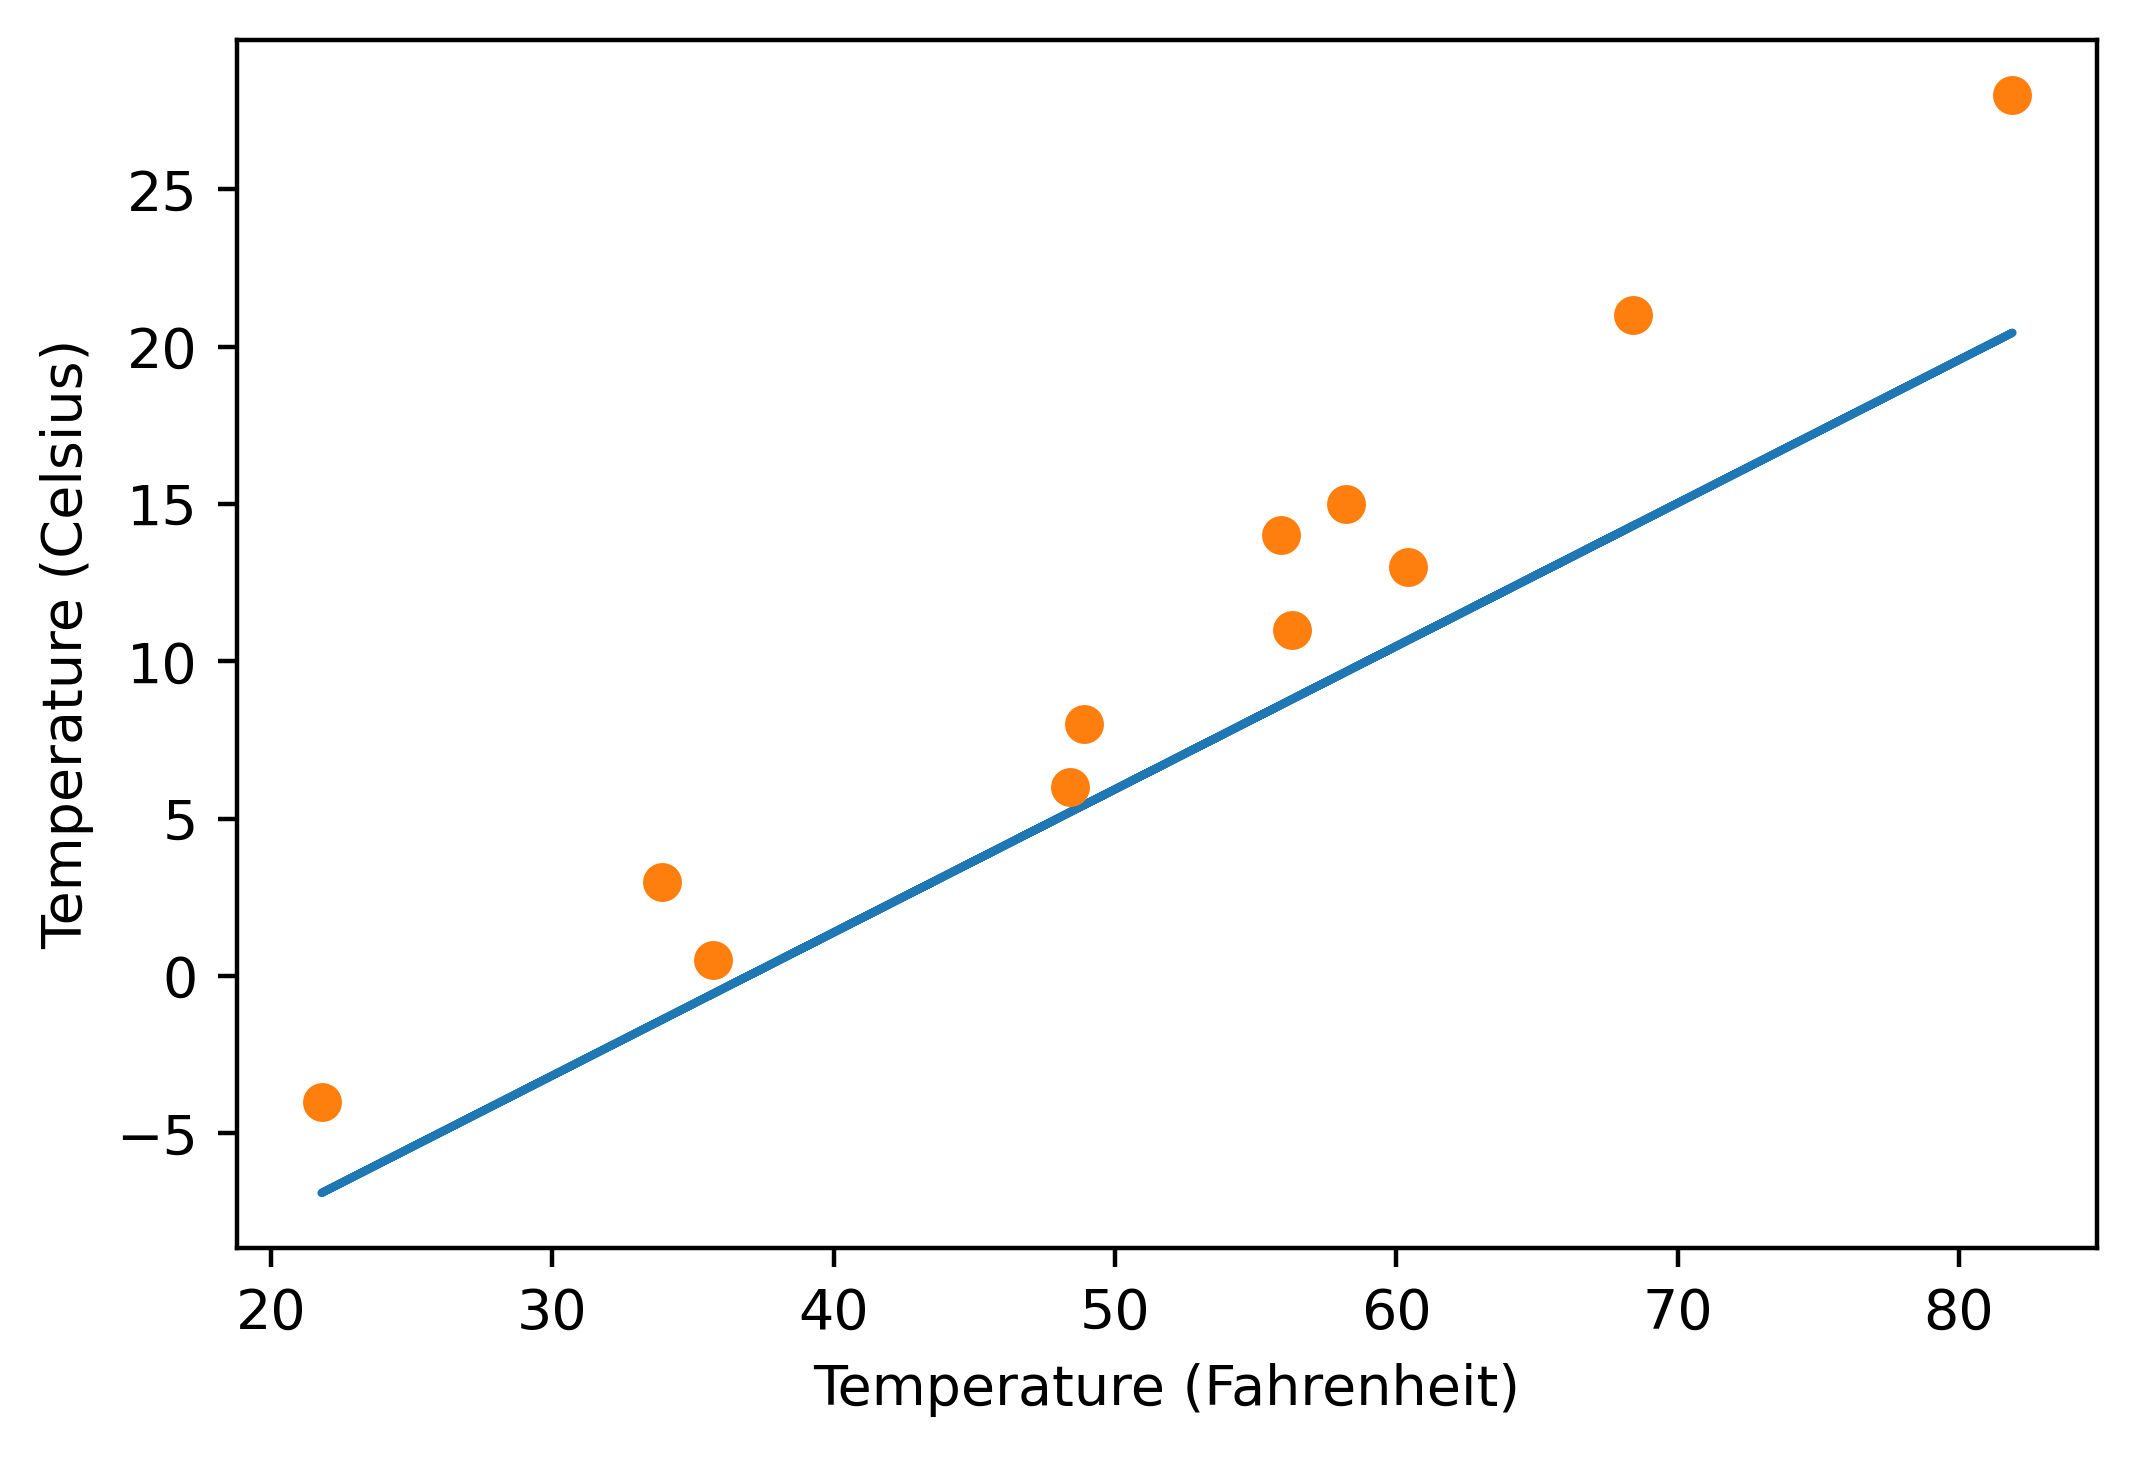

In [23]:
fig = plt.figure(dpi=400)
plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Temperature (Celsius)")
plt.plot(t_u.numpy(), t_p.detach())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [24]:
def model(t_u, w, b):
    return w * t_u + b

def loss_fn(t_p, t_c):
    # (w * t_u + b - t_c)^2 where t_u and t_c are tensors
    squared_diffs = (t_p - t_c) ** 2
    return squared_diffs.mean()

params = torch.tensor([0.0, 1.0], requires_grad=True)

In [25]:
params.grad is None

True

In [26]:
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()
params.grad

tensor([-1260.7000,   -19.0000])

In [27]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        loss.backward()
        with torch.no_grad():
            params -= learning_rate * params.grad
        if epoch % 500 == 0:
            print('Epoch %d, loss %f'% (epoch, float(loss)))
    return params 

In [28]:
new_params = training_loop(
    n_epochs=5000,
    learning_rate=1e-2,
    params=torch.tensor([1., 0.], requires_grad=True),
    t_u=t_un,
    t_c=t_c
)

Epoch 500, loss 2.927646
Epoch 1000, loss 2.927645
Epoch 1500, loss 2.927645
Epoch 2000, loss 2.927645
Epoch 2500, loss 2.927645
Epoch 3000, loss 2.927645
Epoch 3500, loss 2.927645
Epoch 4000, loss 2.927645
Epoch 4500, loss 2.927645
Epoch 5000, loss 2.927645


In [29]:
import torch.optim as optim

dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [30]:
params = torch.tensor([1., 0.], requires_grad=True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr=learning_rate)

In [31]:
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)

optimizer.zero_grad()
loss.backward()
optimizer.step()

params

tensor([ 9.5483e-01, -8.2600e-04], requires_grad=True)

In [32]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

t_p = model(t_un, *params)
loss = loss_fn(t_p, t_c)

optimizer.zero_grad()
loss.backward()
optimizer.step()

params

tensor([1.1461, 0.2100], requires_grad=True)

In [33]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs+1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 500 == 0:
            print("Epoch %d, loss %f" % (epoch, float(loss)))
    return params

In [34]:
params = torch.tensor([1., 0.], requires_grad=True)
learning_rate = 1e-1
optimizer = optim.Adam([params], lr=learning_rate)

new_params = training_loop(
    n_epochs=2000,
    optimizer=optimizer,
    params=params,
    t_u=t_u,
    t_c=t_c
)

Epoch 500, loss 7.612900
Epoch 1000, loss 3.086700
Epoch 1500, loss 2.928579
Epoch 2000, loss 2.927644


In [35]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)
shuffled_indices = torch.randperm(n_samples)
shuffled_indices

tensor([ 5,  7, 10,  1,  8,  3,  0,  6,  9,  2,  4])

In [36]:
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
train_indices, val_indices

(tensor([ 5,  7, 10,  1,  8,  3,  0,  6,  9]), tensor([2, 4]))

In [37]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u
train_t_c, val_t_c, train_t_u, val_t_u

def model(t_u, w1, w2, b):
    return w2 * t_u ** 2 + w1 * t_u + b

In [38]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    for epoch in range(1, n_epochs +1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)
        
        val_t_p = model(val_t_u, *params)
        val_loss = loss_fn(val_t_p, val_t_c)
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch {epoch} - train loss {train_loss.item():.4f}, validation loss {val_loss.item():.4f}")
    return params

In [39]:
params = torch.tensor([1., 1., 0.], requires_grad=True)
learning_rate = 1e-4
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs=30000,
    optimizer=optimizer,
    params=params,
    train_t_u=train_t_un,
    val_t_u=val_t_un,
    train_t_c=train_t_c,
    val_t_c=val_t_c
)

Epoch 1 - train loss 681.2131, validation loss 651.4102
Epoch 2 - train loss 402.8719, validation loss 384.9200
Epoch 3 - train loss 240.9870, validation loss 228.7854
Epoch 500 - train loss 11.9509, validation loss 2.6261
Epoch 1000 - train loss 9.2196, validation loss 2.4695
Epoch 1500 - train loss 7.3807, validation loss 2.4493
Epoch 2000 - train loss 6.1420, validation loss 2.5055
Epoch 2500 - train loss 5.3073, validation loss 2.6000
Epoch 3000 - train loss 4.7442, validation loss 2.7100
Epoch 3500 - train loss 4.3639, validation loss 2.8218
Epoch 4000 - train loss 4.1066, validation loss 2.9277
Epoch 4500 - train loss 3.9320, validation loss 3.0240
Epoch 5000 - train loss 3.8131, validation loss 3.1090
Epoch 5500 - train loss 3.7317, validation loss 3.1826
Epoch 6000 - train loss 3.6754, validation loss 3.2454
Epoch 6500 - train loss 3.6361, validation loss 3.2982
Epoch 7000 - train loss 3.6082, validation loss 3.3423
Epoch 7500 - train loss 3.5881, validation loss 3.3787
Epoch 8

tensor([-1.0797,  0.6034, -1.7563], requires_grad=True)